In [15]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import pickle

In [2]:
#read in file
with open('../data/data_simple_preprocess/complete_corpus_simple_preprocess.txt', 'rb') as file:
    complete_corpus_simple_preprocess = pickle.load(file)

In [3]:
# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=(text), tags=[title]) for title, text in complete_corpus_simple_preprocess.items()]

In [4]:
# Train a Doc2Vec model
model = Doc2Vec(vector_size=20, min_count=1, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [5]:
# Function to get similarity matrix
def get_similarity_matrix(model, texts):
    titles = list(texts.keys())
    vectors = [model.dv[title] for title in titles]
    similarity_matrix = cosine_similarity(vectors)
    return titles, similarity_matrix

In [6]:
# Get similarity matrix
titles, similarity_matrix = get_similarity_matrix(model, complete_corpus_simple_preprocess)

In [7]:
# Print similarity matrix
print("Similarity Matrix:\n", similarity_matrix)

Similarity Matrix:
 [[ 0.9999999   0.9445117   0.28493968 ...  0.03392377  0.71673
   0.7779956 ]
 [ 0.9445117   0.99999994  0.32288054 ... -0.09774019  0.6742533
   0.77658033]
 [ 0.28493968  0.32288054  1.         ...  0.2846884   0.3271602
   0.3936594 ]
 ...
 [ 0.03392377 -0.09774019  0.2846884  ...  1.          0.08856116
   0.04714006]
 [ 0.71673     0.6742533   0.3271602  ...  0.08856116  1.
   0.6129056 ]
 [ 0.7779956   0.77658033  0.3936594  ...  0.04714006  0.6129056
   1.0000001 ]]


In [16]:
sim_matrix=pd.DataFrame(similarity_matrix)

In [110]:
counter = 0
for i in complete_corpus_simple_preprocess.keys():
    counter += 1
    if counter == 26:
        print(i)
        break

Old Testament


In [ ]:
# 3 is Bible
# 25 is New Testament
# 26 is Old Testament

In [118]:
bible_similarity=sim_matrix[[2,24,25]]

In [89]:
pd.set_option('display.max_columns', 50)
sim_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,1.000000,0.944512,0.284940,0.686059,0.373914,0.227765,0.423836,0.299363,0.644625,0.157681,0.169457,0.340693,0.596843,0.326159,0.170635,0.187178,0.237539,0.171078,0.279522,0.279457,0.479201,0.127178,0.198622,0.799556,-0.173303,0.260609,0.313676,0.577468,0.070468,0.050674,0.197459,0.094755,0.182828,0.078174,0.145261,0.138270,0.167220,0.424033,0.059781,0.592967,0.258230,0.421036,0.746655,0.033924,0.716730,0.777996
1,0.944512,1.000000,0.322881,0.625375,0.211884,0.212629,0.291050,0.117510,0.554383,0.015276,0.209015,0.233914,0.554397,0.313445,0.196754,0.331205,0.263298,0.185679,0.274984,0.336506,0.544195,0.144359,0.139314,0.679379,-0.093206,0.302426,0.293050,0.546166,0.083076,-0.105171,0.308811,0.239128,0.299269,0.171780,0.269887,0.268372,0.281583,0.298163,0.107775,0.520592,0.261589,0.386671,0.832947,-0.097740,0.674253,0.776580
2,0.284940,0.322881,1.000000,0.235539,0.192297,0.129237,0.124815,0.232108,0.207764,0.366263,0.310302,0.184801,0.187495,0.230838,0.404991,0.285750,0.232770,0.281471,0.178081,0.148323,0.230149,0.270169,0.371428,0.272709,0.617879,0.996786,0.212004,0.244758,0.517336,0.268773,0.343492,0.409484,0.471754,0.419951,0.359072,0.368361,0.357974,0.198295,0.392109,0.314232,0.377415,0.372127,0.261361,0.284688,0.327160,0.393659
3,0.686059,0.625375,0.235539,1.000000,0.389746,0.459118,0.524229,0.354843,0.781739,0.140303,0.514051,0.649466,0.555614,0.376571,0.455278,0.329694,0.638223,0.192868,0.463661,0.476601,0.294665,0.015267,0.007845,0.727629,-0.172773,0.216115,0.106604,0.674979,0.090186,0.020351,0.304107,0.187051,0.304183,0.332769,0.299552,0.339783,0.392719,0.274443,0.115013,0.516729,0.494775,0.514119,0.493435,0.142866,0.578411,0.407782
4,0.373914,0.211884,0.192297,0.389746,1.000000,0.175034,0.356716,0.508957,0.634088,0.836558,0.540910,0.701731,0.359822,0.423472,0.277244,0.405495,0.610487,0.507113,0.533772,0.374879,0.476555,0.140293,0.541570,0.481948,0.031986,0.173103,0.367021,0.303305,0.346636,0.457848,0.454328,0.353758,0.445472,0.485380,0.459940,0.443058,0.413283,0.641502,0.613543,0.348919,0.648848,0.806437,0.058184,0.781045,0.390533,0.130727
5,0.227765,0.212629,0.129237,0.459118,0.175034,1.000000,0.714690,0.285516,0.300705,0.140337,0.547707,0.296435,0.542455,0.459426,0.523517,0.522372,0.413601,0.231587,0.540326,0.611613,0.337679,0.695721,0.236352,0.198428,0.481162,0.150768,0.502260,0.402606,0.350563,0.284581,0.574153,0.571767,0.498218,0.516342,0.533993,0.552583,0.611370,0.267948,0.286898,0.241081,0.344723,0.102844,0.239630,0.165398,0.290727,0.237758
6,0.423836,0.291050,0.124815,0.524229,0.356716,0.714690,1.000000,0.700684,0.482163,0.393436,0.532278,0.573699,0.691129,0.679189,0.606694,0.237840,0.404983,0.361445,0.418193,0.347497,0.195262,0.408680,0.264484,0.504505,0.231183,0.136650,0.561744,0.369933,0.476367,0.530179,0.327773,0.255104,0.264597,0.317893,0.155501,0.239324,0.281890,0.530209,0.032191,0.466016,0.022784,0.012386,0.169386,0.245360,0.396403,0.487391
7,0.299363,0.117510,0.232108,0.354843,0.508957,0.285516,0.700684,1.000000,0.614986,0.696517,0.263222,0.580168,0.747494,0.726364,0.491551,-0.015342,0.202317,0.593636,0.540758,-0.040030,0.019236,0.332275,0.567401,0.548806,0.167444,0.230041,0.441030,0.452659,0.646314,0.879342,0.012524,-0.029186,0.106785,0.202616,-0.021171,0.065314,0.074278,0.832972,0.197980,0.741578,0.006849,0.206880,0.185836,0.511055,0.574370,0.460092
8,0.644625,0.554383,0.207764,0.781739,0.634088,0.300705,0.482163,0.614986,1.000000,0.476943,0.507065,0.658091,0.753433,0.468180,0.283696,0.373286,0.593426,0.366684,0.633567,0.207249,0.257760,0.050839,0.299938,0.689239,-0.125593,0.186047,0.145814,0.807637,0.363048,0.312162,0.357709,0.190586,0.428186,0.458153,0.347540,0.391911,0.429218,0.594671,0.424869,0.755143,0.513578,0.656771,0.569298,0.345911,0.817117,0.380797
9,0.157681,0.015276,0.366263,0.140303,0.836558,0.140337,0.393436,0.696517,0.476943,1.000000,0.496945,0.638034,0.42470

In [112]:
bible_similarity=bible_similarity.rename(columns={3:"Bible Complete", 24:"New Testament", 25:"Old Testament"})

In [8]:
import matplotlib.cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

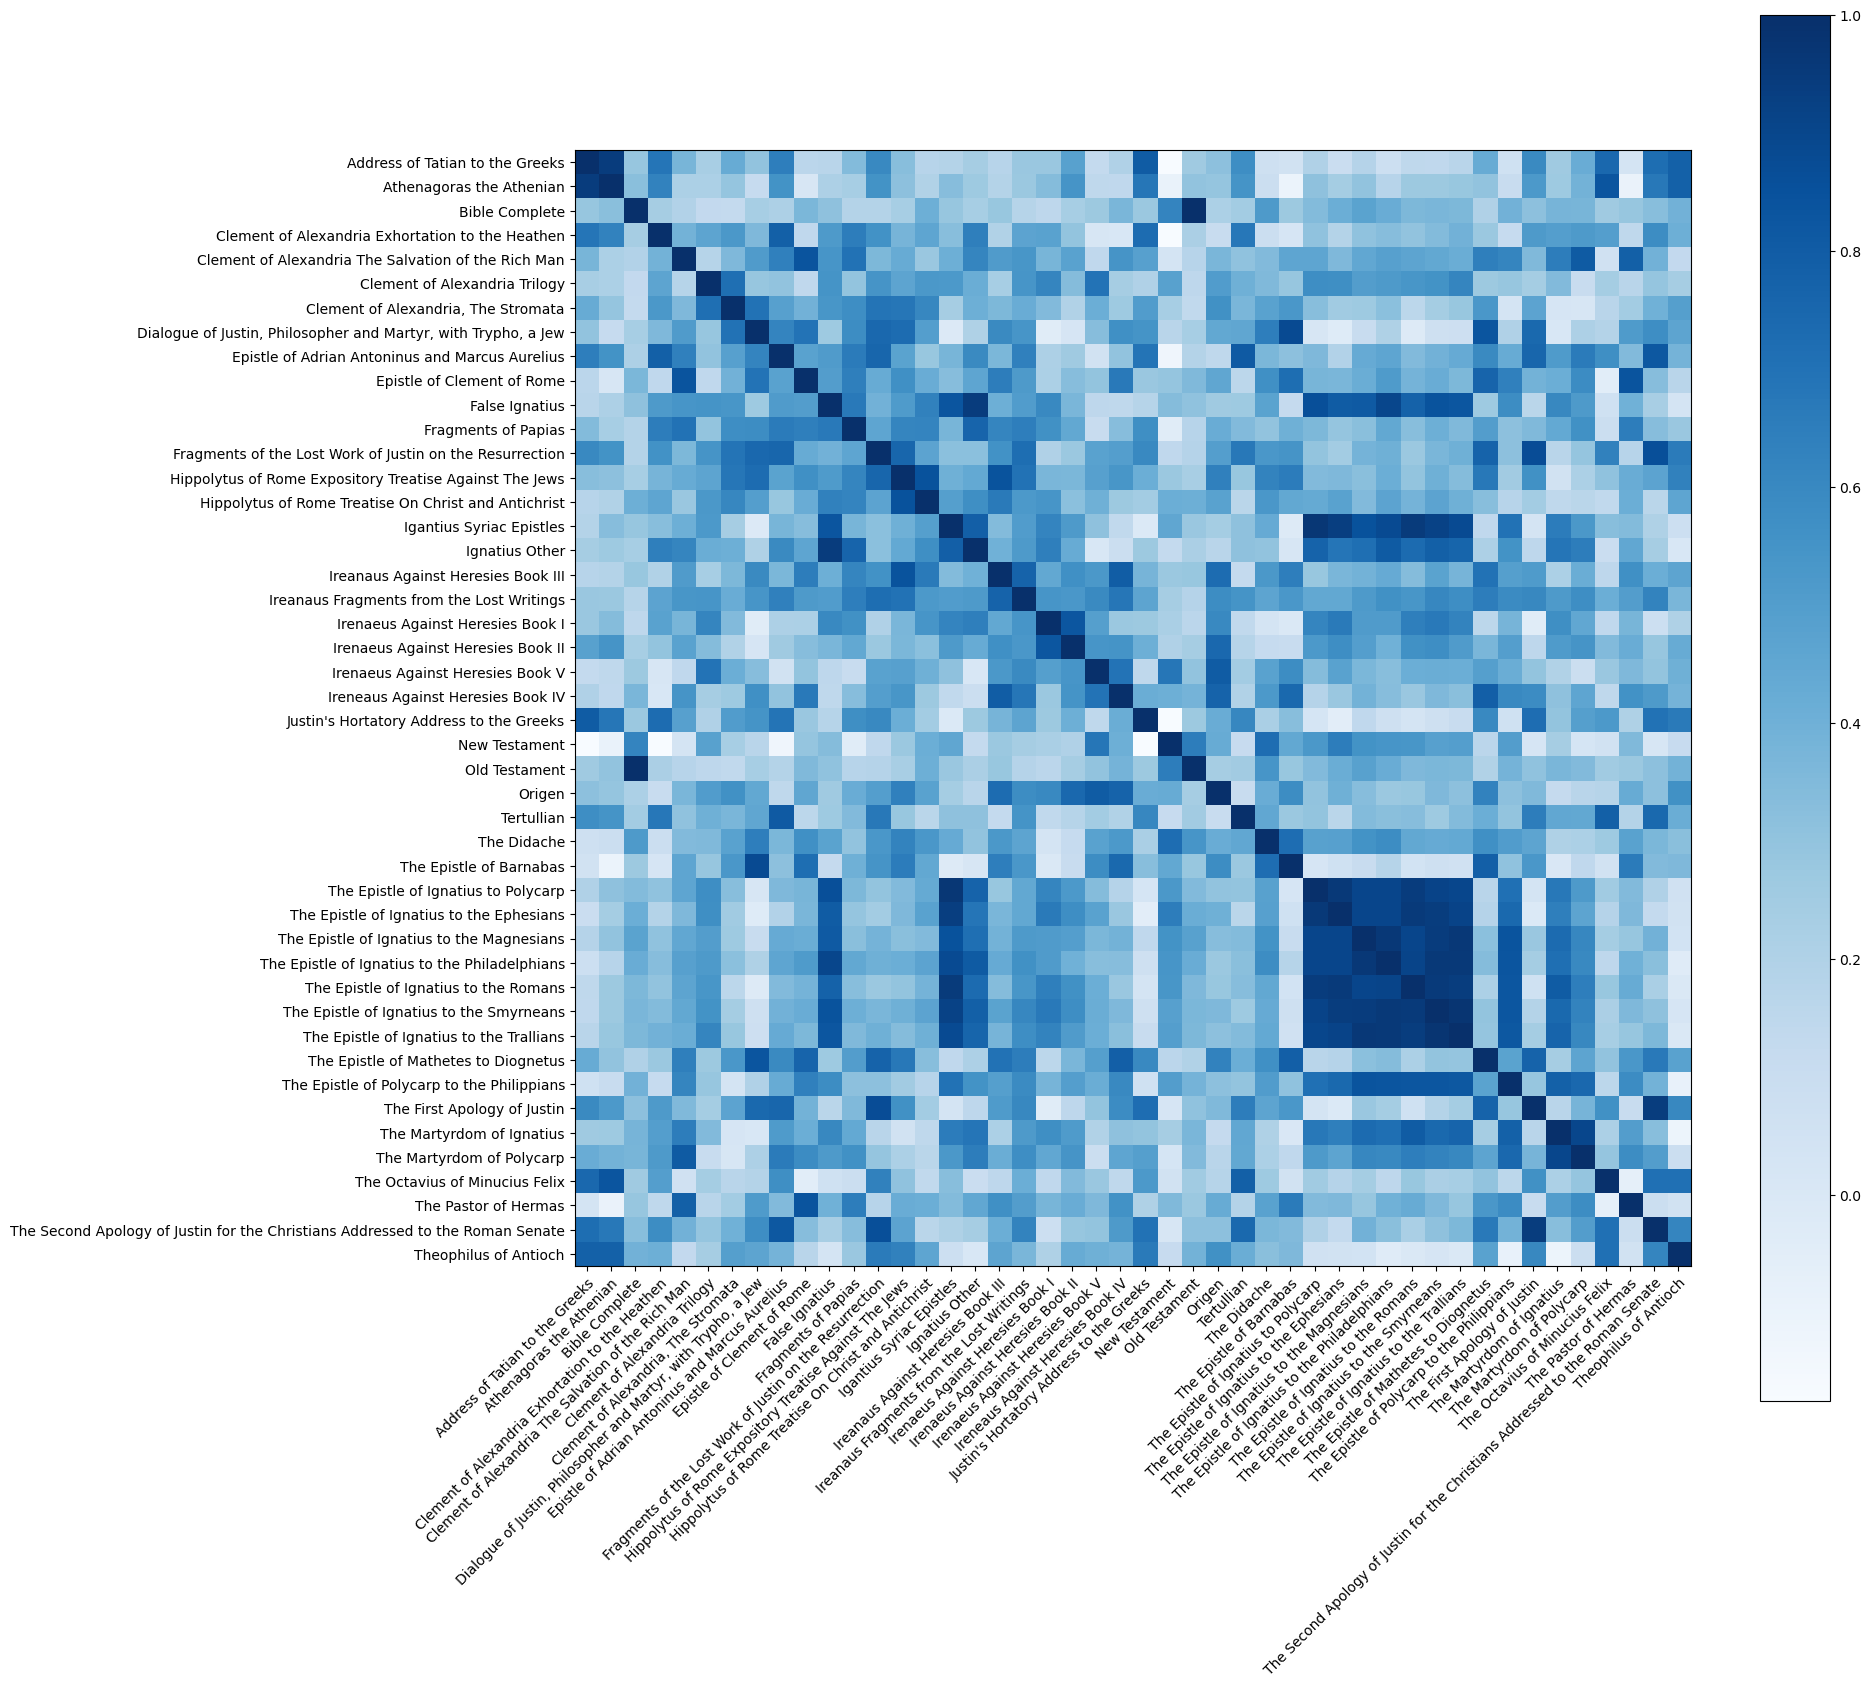

In [9]:
fig = plt.figure(figsize=(18,18))  # change the figsize to control the resolution
ax = fig.add_subplot(111)
cmap = matplotlib.colormaps['Blues']  # you may use other build-in colormap or define you own colormap
# if your data is not in range[0,1], use a normalization. Here is normalized by min and max values.
norm = Normalize(vmin=np.amin(similarity_matrix), vmax=np.amax(similarity_matrix))
image = ax.imshow(similarity_matrix, cmap=cmap, norm=norm)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(titles)), labels=titles)
ax.set_yticks(np.arange(len(titles)), labels=titles)

#rotate right by 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.colorbar(image)

plt.show()

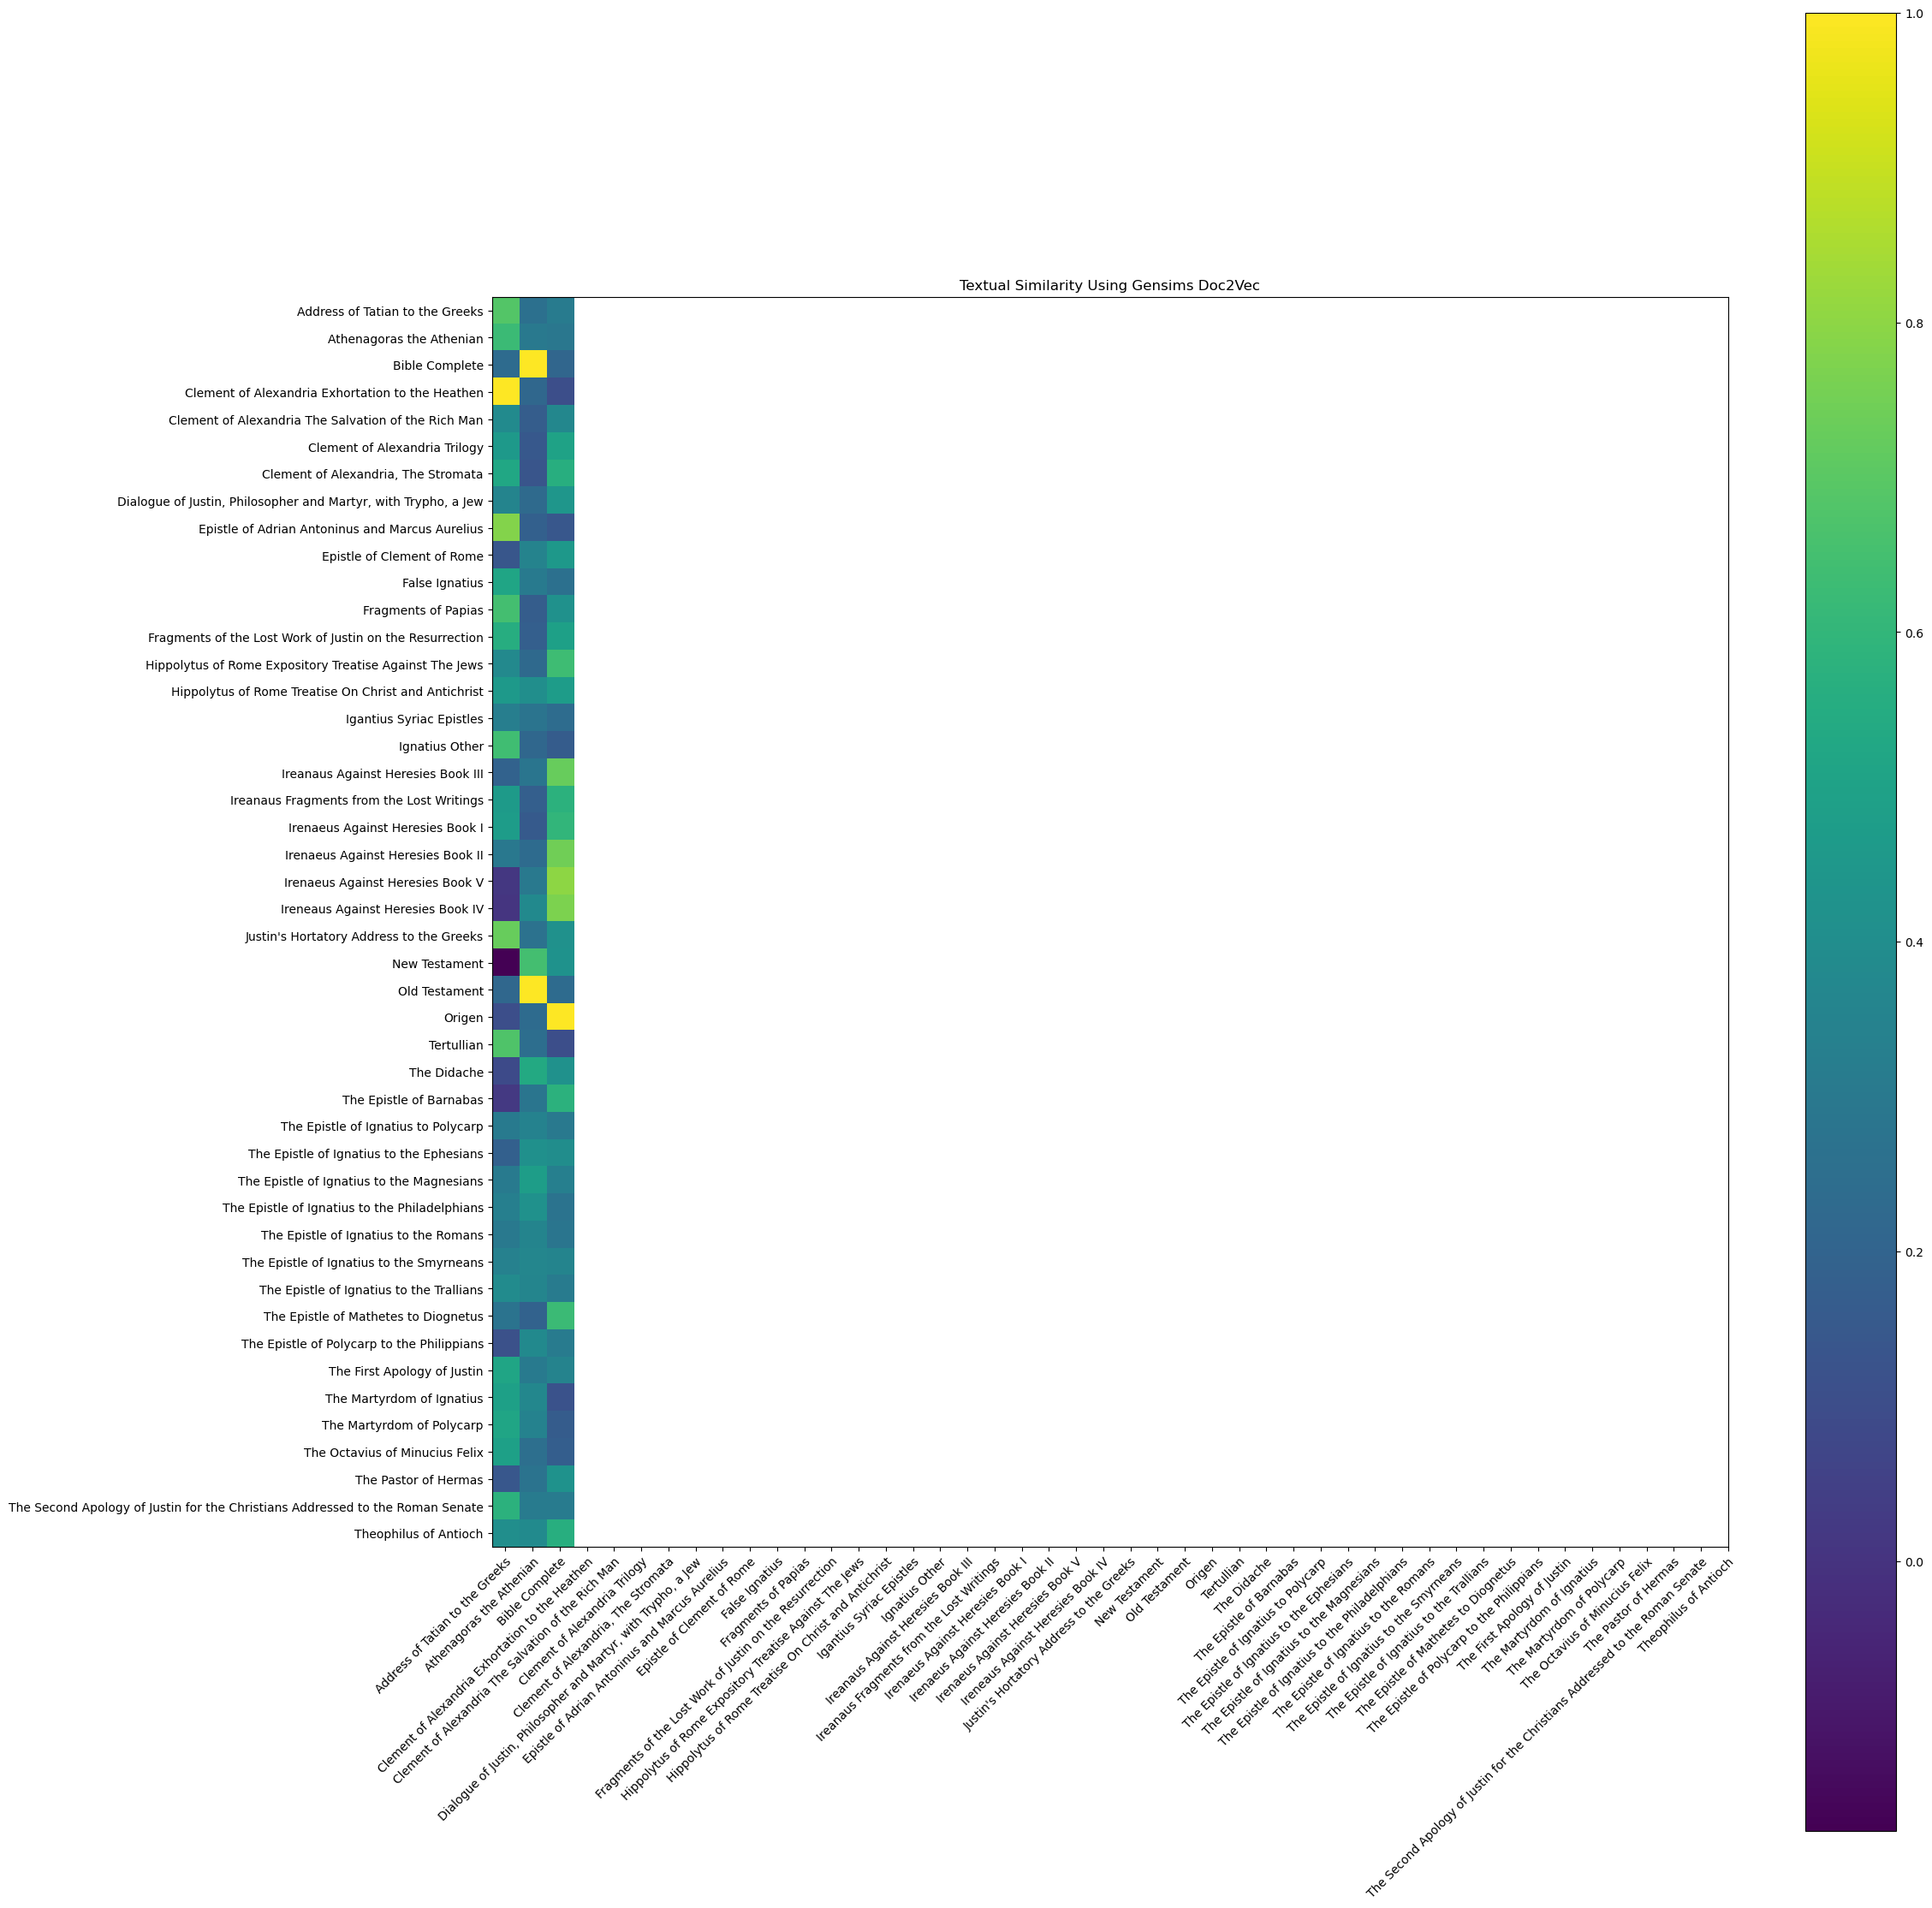

In [59]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

fig = plt.figure(figsize=(24,24))  # change the figsize to control the resolution
ax = fig.add_subplot(111)
im = ax.imshow(bible_similarity, norm=norm)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(bible_similarity)), labels=titles)
ax.set_yticks(np.arange(len(titles)), labels=titles)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.colorbar(im)

ax.set_title("Textual Similarity Using Gensims Doc2Vec")
fig.tight_layout()
plt.show()

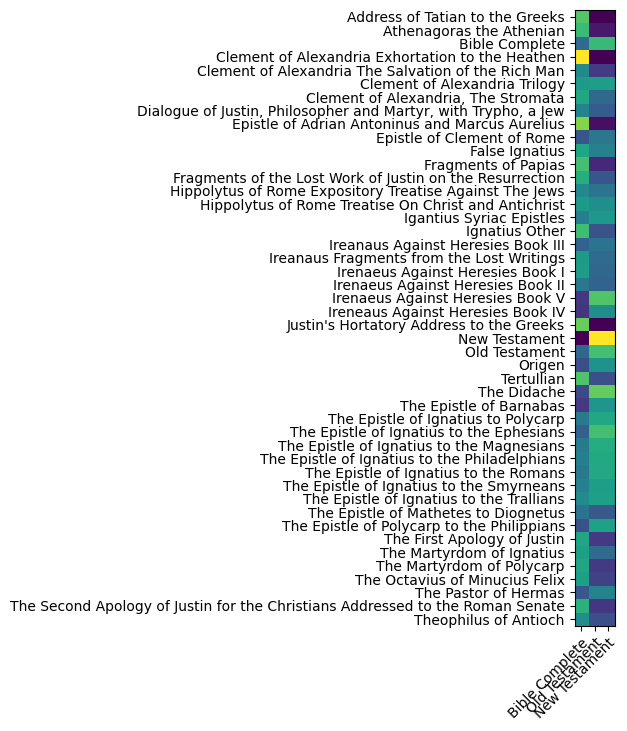

In [99]:
x_labels=['Bible Complete', 'Old Testament', 'New Testament']

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
im = ax.imshow(bible_similarity, norm=norm)
norm = Normalize(vmin=np.amin(similarity_matrix), vmax=np.amax(similarity_matrix))
ax.set_yticks(np.arange(len(titles)), labels=titles)
ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show();

In [119]:
bible_similarity

,2,24,25
0,0.284940,-0.173303,0.260609
1,0.322881,-0.093206,0.302426
2,1.000000,0.617879,0.996786
3,0.235539,-0.172773,0.216115
4,0.192297,0.031986,0.173103
5,0.129237,0.481162,0.150768
6,0.124815,0.231183,0.136650
7,0.232108,0.167444,0.230041
8,0.207764,-0.125593,0.186047
9,0.366263,0.293552,0.348730
